# Analise Financeira com Python

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

from plotly.offline import plot, iplot
import plotly
import plotly.offline as py

import plotly.express as px
import plotly.graph_objects as go

In [6]:
# Função para pegar os dados do código da ação criar um dataframe
def get_code(code):
    df = web.DataReader(code,'yahoo')
    df.index = pd.to_datetime(df.index)
    return df

In [3]:
# Lista de códigos de ações que desejar, aqui vai um exemplo
lista = ['AESB3.sa','BARI11.sa','BBFI11B.sa','COGN3.sa','DEVA11.sa','GOLD11.sa','HCTR11.sa','OIBR3.sa','SPTW11.sa','XPPR11.sa']


In [7]:
# Criação de uma lista de listas com os dados coletados de cada ação
dados = []
for i in range(0, len(lista)):
    codigo = lista[i]
    dado = get_code(codigo)
    dados.append([codigo,dado])    

In [9]:
# Colunas geradas pela função DataReader()
dados[0][1].columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

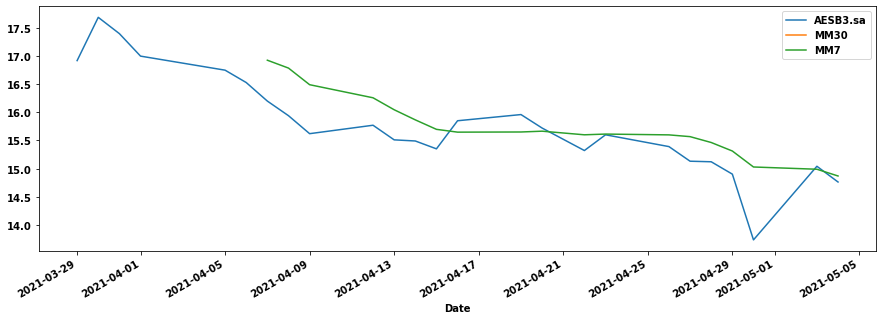

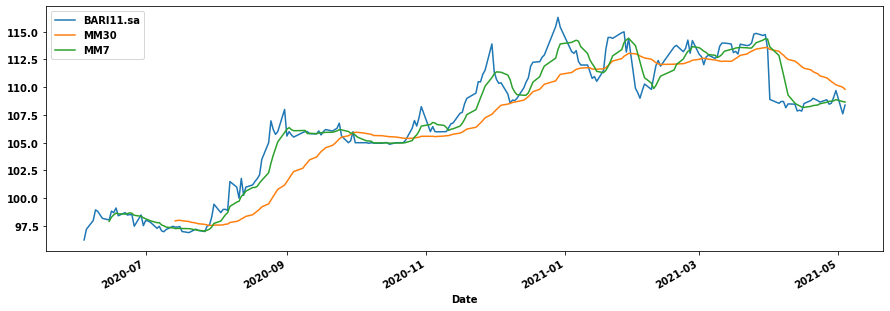

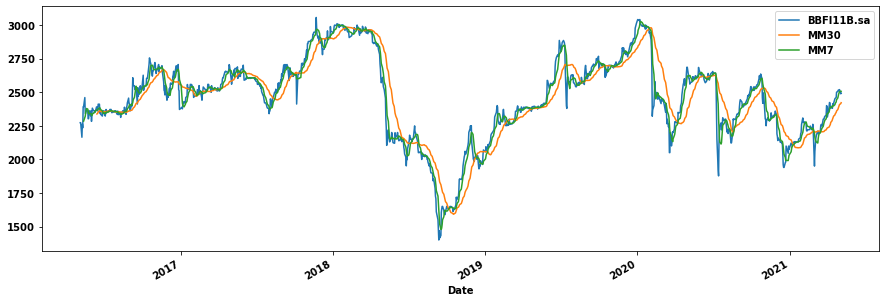

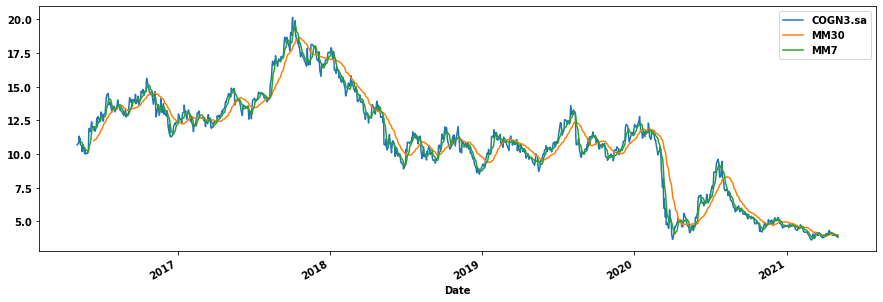

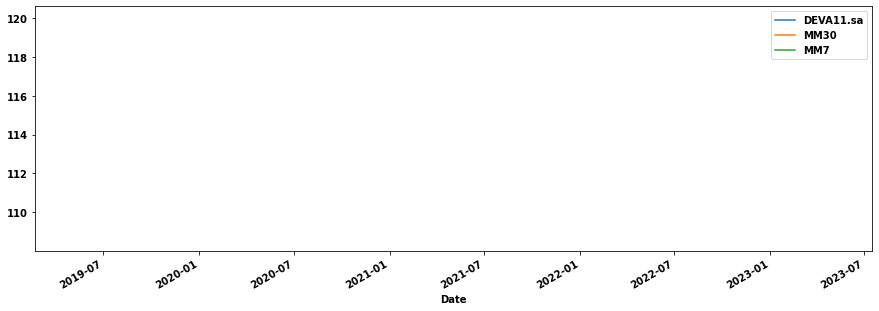

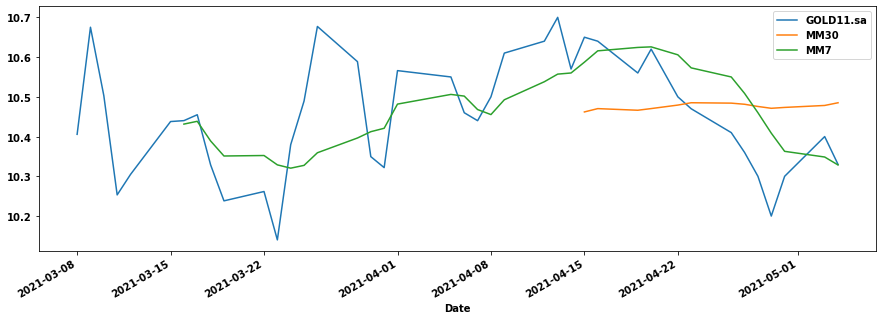

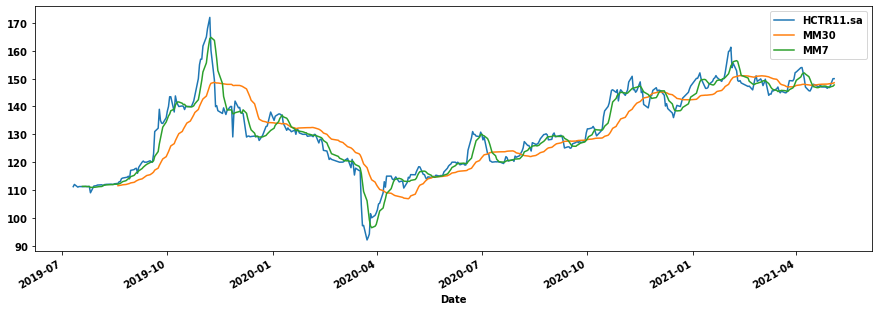

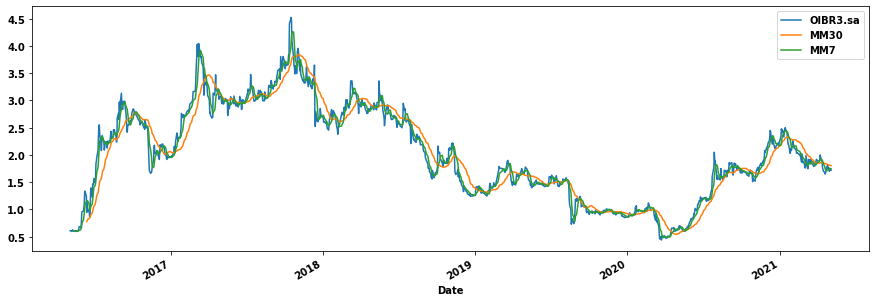

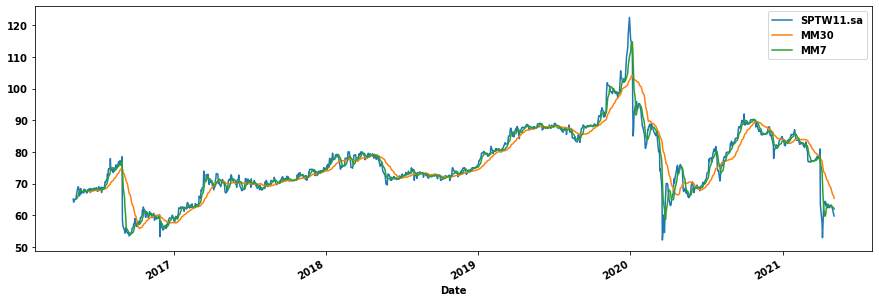

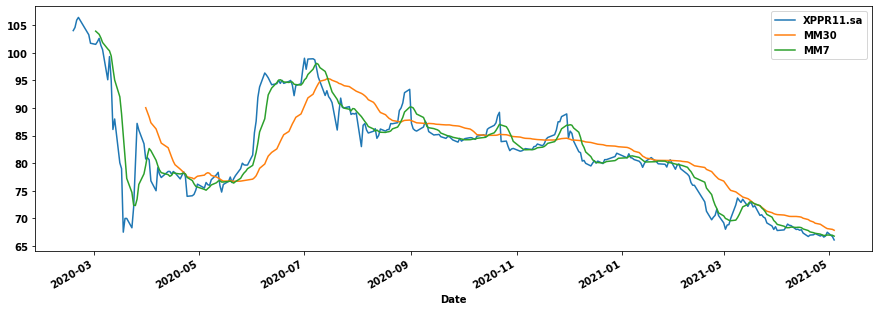

In [12]:
# Elaboração dos gráficos com as linhas de preço de fechamento, média movel de um semana e de um mês com o matplotlib
for i in range(0, len(dados)):
    dados[i][1]['Adj Close'].plot(figsize = (15,5), label=dados[i][0])
    dados[i][1]['Adj Close'].rolling(28).mean().plot(label='MM30') # Média movel mensal
    dados[i][1]['Adj Close'].rolling(7).mean().plot(label='MM7') # Média móvel semanal
    plt.legend()
    plt.show()

In [20]:
dados[0][0]

'AESB3.sa'

In [21]:
# agora vamos usar a biblioteca plotly pois ela tem alguns recursos que facilitam e deixam mais rápido a analise
for i in range(0, len(dados)):
    trace = go.Candlestick(x = dados[i][1].index,
    open=dados[i][1]['Open'],
    high=dados[i][1]['High'],
    low=dados[i][1]['Low'],
    close=dados[i][1]['Close'])
    data = [trace]

    py.iplot(data, filename='gráfico de ações')
    nome = [i][0]

    layout = go.Layout(
    title = nome,
    title_x = 0.5,
    xaxis = dict(
    rangeslider = dict(
    visible = True)))

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)